# Time Series Forecasting Population Dynamics of Chitala Fish from Catch Data in Raidighi site using Machine Learning Techniques.

First we need to install required packages :
    * pip install tensorflow==1.13.1
    * pip install keras==2.3.1
    * pip install sklearn

Import all required libraries in notebook using following codes:

In [3]:
import pandas as pd
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense
 

In this study, we have developed different Long Short-Term Memory (LSTM) models which are basically deep network architectures were tested for forecasting populations of Chitala Fish in Raidighi. An approach was proposed to capture the temporal evolution of the population of Chitala based on the time series that model the size of population information. LSTM model is a type of recurrent neural network capable of learning order dependence in sequence prediction problems. The structure allows RNN to retain temporal relationships by creating an association between the current time-step and previous time-step The approach showed significant performance and has proven to be able to forecast population size in coming years. We have used bootstrap procedure to resample the original data a number of times and calculated the statistic of interest.

We have imported LSTM function from Keras package. Since our data is continuous, root mean squared error was used which allows us conducting a selection of best models for each site.

## Conv LSTM

In [4]:
from numpy import array
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import ConvLSTM2D
rmse = []
cfu= []
cfl= []
nsteps = []
for j in [6]:
    for w in range(20):
        nsteps.append(j)
        # Defining a function to split a univariate sequence into samples for LSTM Model
        def split_sequence(sequence, n_steps):
            X, y = list(), list()
            for i in range(len(sequence)):
                # find the end of this pattern
                end_ix = i + n_steps
                # check if we are beyond the sequence
                if end_ix > len(sequence)-1:
                    break
                # gather input and output parts of the pattern
                seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
                X.append(seq_x)
                y.append(seq_y)
            return array(X), array(y)

        # define input sequence
        data=pd.read_excel('Chitala_TS.xlsx', sheet_name='Sheet3')

        tdw=pd.Series([2016])
        train_data=data[~data['Year '].isin(tdw)]
        test_data=data[data['Year '].isin(tdw)]
        test_data=test_data.set_index(np.arange(0,len(test_data)))
        n_step1 = j
        # split into samples
        X, y = split_sequence(train_data.Value, n_step1)
        # reshape from [samples, timesteps] into [samples, timesteps, rows, columns, features]
        n_features = 1
        n_seq = 2
        n_step2 = int(n_step1/2)
        X = X.reshape((X.shape[0], n_seq, 1, n_step2, n_features))
        # define model
        model = Sequential()
        model.add(ConvLSTM2D(filters=64, kernel_size=(1,2), activation='relu', input_shape=(n_seq, 1, n_step2, n_features)))
        model.add(Flatten())
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse')
        # fit model
        model.fit(X, y, epochs=500, verbose=0)
        # demonstrate prediction

        x_input, y_input = split_sequence(test_data.Value, n_step1)


        x_input = x_input.reshape((x_input.shape[0], n_seq,1, n_step2, n_features))

        #Prediction on Test dataset
        yhat = model.predict(x_input, verbose=0)
     
        yhat=yhat.reshape(-1)

        # Calculating Mean Sum of squared error
        mse=1/len(yhat)*sum(np.square(y_input-yhat))
        mse

        #95% Confidence Interval at alpha=0.05, zalpha/2=1.96
        yhat_b = 1/len(yhat)*sum(yhat)
        ieta = np.sqrt(1/len(yhat)*sum(np.square(yhat-yhat_b)))
        CI_L = yhat_b-1.96*ieta
        CI_U = yhat_b+1.96*ieta

        # Confidence Prediction at each step points
        import matplotlib.pyplot as plt
        y_l=yhat-1.96*ieta
        y_u=yhat+1.96*ieta

       
        print('RMSE',np.sqrt(mse))
        rmse.append(np.sqrt(mse))
        print('Confidence Interval :', CI_L , CI_U)
        cfu.append(CI_U)
        cfl.append(CI_L)
        
result=pd.DataFrame({'RMSE':rmse,'CI_U':cfu,'CI_L':cfl})
result.to_csv('Convlstm_R.csv', index=None)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
RMSE 4.7839208313807235
Confidence Interval : 3.3687086460843423 17.808274074608608
RMSE 3.994429299700134
Confidence Interval : 1.0730763432781796 17.77660408045839
RMSE 3.783163502661705
Confidence Interval : 3.2074722877488435 13.589478290940733
RMSE 5.052136675959185
Confidence Interval : 1.2996544459804475 21.55010314590289
RMSE 2.7000873195279933
Confidence Interval : 2.3036103907911176 15.319286121558328
RMSE 3.6643178295810137
Confidence Interval : 2.6340011237731114 16.462445549302245
RMSE 4.637284273050603
Confidence Interval : 3.6387873620959015 18.76135562547327
RMSE 3.2114554114309817
Confidence Interval : 4.4986615746505 14.794705652268037
RMSE 3.509570475341564
Confidence Interval : 4.207965854301335 16.180029070879733
RMSE 3.9317210913499054
Confidence Interval : 2.5232609046046113 15.999420411135336
RMSE 3.407736746724178
Confidence Interval : 3.73519

## Vanilla LSTM

In [5]:
# univariate lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Embedding
import numpy as np
import pandas as pd
rmse = []
cfu= []
cfl= []
nsteps = []
for j in [3]:
    for i in range(20):
        nsteps.append(j)
        # Defining a function to split a univariate sequence into samples for LSTM Model
        def split_sequence(sequence, n_steps):
            X, y = list(), list()
            for i in range(len(sequence)):
                # find the end of this pattern
                end_ix = i + n_steps
                # check if we are beyond the sequence
                if end_ix > len(sequence)-1:
                    break
                # gather input and output parts of the pattern
                seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
                X.append(seq_x)
                y.append(seq_y)
            return array(X), array(y)

        # define input sequence
        data=pd.read_excel('Chitala_TS.xlsx', sheet_name='Sheet3')

        tdw=pd.Series([2016])
        train_data=data[~data['Year '].isin(tdw)]
        test_data=data[data['Year '].isin(tdw)]
        test_data=test_data.set_index(np.arange(0,len(test_data)))

        # choose a number of time steps
        n_steps = j
        # split into samples
        X, y = split_sequence(train_data.Value, n_steps)

        # reshape from [samples, timesteps] into [samples, timesteps, features]
        n_features = 1
        X = X.reshape((X.shape[0], X.shape[1], n_features))
        # define model
        model = Sequential()

        model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
        model.add(Dense(1))
        
        # compile model
        model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
        # fit model

        history=model.fit(X, y, epochs=200, verbose=0)
        
        # split into samples
        x_input, y_input = split_sequence(test_data.Value, n_steps)

        x_input = x_input.reshape((x_input.shape[0], x_input.shape[1], n_features))

        #Prediction on Test dataset
        yhat = model.predict(x_input, verbose=0)
       
        yhat=yhat.reshape(-1)

        # Calculating Mean Sum of squared error
        mse=1/len(yhat)*sum(np.square(y_input-yhat))
        mse

        #95% Confidence Interval at alpha=0.05, zalpha/2=1.96
        yhat_b = 1/len(yhat)*sum(yhat)
        ieta = np.sqrt(1/len(yhat)*sum(np.square(yhat-yhat_b)))
        CI_L = yhat_b-1.96*ieta
        CI_U = yhat_b+1.96*ieta

        # Confidence Prediction at each step points
        import matplotlib.pyplot as plt
        y_l=yhat-1.96*ieta
        y_u=yhat+1.96*ieta

        
        print('RMSE',np.sqrt(mse))
        rmse.append(np.sqrt(mse))
        print('Confidence Interval :', CI_L , CI_U)
        cfu.append(CI_U)
        cfl.append(CI_L)
        
result=pd.DataFrame({'RMSE':rmse,'CI_U':cfu,'CI_L':cfl})
result.to_csv('Vanillalstm_R.csv', index=None)

RMSE 4.832489266486249
Confidence Interval : 5.239652971670611 18.20808949048759
RMSE 5.047975873842038
Confidence Interval : 4.347462992648378 19.452770954257815
RMSE 5.764980511159181
Confidence Interval : 5.613747914554571 20.73138576091472
RMSE 6.332988134342012
Confidence Interval : 7.246596748872447 21.27567684460628
RMSE 4.555120949069857
Confidence Interval : 3.68168847782197 16.893705304899655
RMSE 4.488585305173586
Confidence Interval : 5.849104523307638 16.99196310873175
RMSE 4.25467088168026
Confidence Interval : 4.5778305326990845 16.957383255651337
RMSE 4.893418925992693
Confidence Interval : 6.143314092155849 17.884627293749098
RMSE 4.911529460724096
Confidence Interval : 5.004031102562076 19.56141119463166
RMSE 5.49597476523423
Confidence Interval : 4.961905092073423 20.449736240764846
RMSE 5.886626034623625
Confidence Interval : 7.618852367030257 19.90585606294207
RMSE 5.302399146972628
Confidence Interval : 6.608325562578009 19.189658454688157
RMSE 4.903849775916062
C

## Stacked LSTM

In [6]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
rmse = []
cfu= []
cfl= []
nsteps = []
for j in [3]:
    for i in range(20):
        nsteps.append(j)
        # Defining a function to split a univariate sequence into samples for LSTM Model
        def split_sequence(sequence, n_steps):
            X, y = list(), list()
            for i in range(len(sequence)):
                # find the end of this pattern
                end_ix = i + n_steps
                # check if we are beyond the sequence
                if end_ix > len(sequence)-1:
                    break
                # gather input and output parts of the pattern
                seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
                X.append(seq_x)
                y.append(seq_y)
            return array(X), array(y)

        # define input sequence
        data=pd.read_excel('Chitala_TS.xlsx', sheet_name='Sheet3')

        tdw=pd.Series([2016])
        train_data=data[~data['Year '].isin(tdw)]
        test_data=data[data['Year '].isin(tdw)]
        test_data=test_data.set_index(np.arange(0,len(test_data)))
        n_steps = j
        # split into samples
        X, y = split_sequence(train_data.Value, n_steps)
        # reshape from [samples, timesteps] into [samples, timesteps, features]
        n_features = 1
        X = X.reshape((X.shape[0], X.shape[1], n_features))
        # define model
        model = Sequential()
        model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
        model.add(LSTM(50, activation='relu'))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse')
        # fit model
        model.fit(X, y, epochs=200, verbose=0)
        # demonstrate prediction
        # split into samples
        x_input, y_input = split_sequence(test_data.Value, n_steps)

        x_input = x_input.reshape((x_input.shape[0], x_input.shape[1], n_features))

        #Prediction on Test dataset
        yhat = model.predict(x_input, verbose=0)
        
        yhat=yhat.reshape(-1)

        # Calculating Mean Sum of squared error
        mse=1/len(yhat)*sum(np.square(y_input-yhat))
        mse

        #95% Confidence Interval at alpha=0.05, zalpha/2=1.96
        yhat_b = 1/len(yhat)*sum(yhat)
        ieta = np.sqrt(1/len(yhat)*sum(np.square(yhat-yhat_b)))
        CI_L = yhat_b-1.96*ieta
        CI_U = yhat_b+1.96*ieta

        # Confidence Prediction at each step points
        import matplotlib.pyplot as plt
        y_l=yhat-1.96*ieta
        y_u=yhat+1.96*ieta


        
        print('RMSE',np.sqrt(mse))
        rmse.append(np.sqrt(mse))
        print('Confidence Interval :', CI_L , CI_U)
        cfu.append(CI_U)
        cfl.append(CI_L)
        
result=pd.DataFrame({'RMSE':rmse,'CI_U':cfu,'CI_L':cfl})
result.to_csv('Stackedlstm_R.csv', index=None)

RMSE 5.433399300585202
Confidence Interval : 4.77505905067829 20.174841470494126
RMSE 3.879567469946415
Confidence Interval : 5.639166492556661 15.99241566161136
RMSE 4.4305218782110325
Confidence Interval : 3.8811773782667585 18.132957346668135
RMSE 5.314884947734409
Confidence Interval : 4.1448090524759245 20.797129241828817
RMSE 4.980508869886167
Confidence Interval : 4.675778418617157 19.333972477412846
RMSE 5.676000911324853
Confidence Interval : 6.652670878677937 20.756542081459322
RMSE 4.733478066179277
Confidence Interval : 2.1408354560299063 18.866200011329845
RMSE 4.575525814074379
Confidence Interval : 2.4382582114282503 17.50823896400035
RMSE 6.095759552626691
Confidence Interval : 5.484261818805914 22.45483717513126
RMSE 4.600853034804604
Confidence Interval : 3.341541622315888 17.42702058861483
RMSE 4.311396699036962
Confidence Interval : 3.767401653335173 17.665666940007924
RMSE 4.388941425048291
Confidence Interval : 2.84642693668971 17.267455022165812
RMSE 5.8616027160

## Bidirectional LSTM

In [7]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Bidirectional
rmse = []
cfu= []
cfl= []
nsteps = []
for j in [7]:
    for i in range(20):
        nsteps.append(j)
        # Defining a function to split a univariate sequence into samples for LSTM Model
        def split_sequence(sequence, n_steps):
            X, y = list(), list()
            for i in range(len(sequence)):
                # find the end of this pattern
                end_ix = i + n_steps
                # check if we are beyond the sequence
                if end_ix > len(sequence)-1:
                    break
                # gather input and output parts of the pattern
                seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
                X.append(seq_x)
                y.append(seq_y)
            return array(X), array(y)

        # define input sequence
        data=pd.read_excel('Chitala_TS.xlsx', sheet_name='Sheet3')

        tdw=pd.Series([2016])
        train_data=data[~data['Year '].isin(tdw)]
        test_data=data[data['Year '].isin(tdw)]
        test_data=test_data.set_index(np.arange(0,len(test_data)))
        n_steps = j
        # split into samples
        X, y = split_sequence(train_data.Value, n_steps)
        # reshape from [samples, timesteps] into [samples, timesteps, features]
        n_features = 1
        X = X.reshape((X.shape[0], X.shape[1], n_features))
        # define model
        model = Sequential()
        model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse')
        # fit model
        model.fit(X, y, epochs=200, verbose=0)
        # demonstrate prediction

        x_input, y_input = split_sequence(test_data.Value, n_steps)

        
        x_input = x_input.reshape((x_input.shape[0], x_input.shape[1], n_features))

        #Prediction on Test dataset
        yhat = model.predict(x_input, verbose=0)
       
        yhat=yhat.reshape(-1)

        # Calculating Mean Sum of squared error
        mse=1/len(yhat)*sum(np.square(y_input-yhat))
        mse

        #95% Confidence Interval at alpha=0.05, zalpha/2=1.96
        yhat_b = 1/len(yhat)*sum(yhat)
        ieta = np.sqrt(1/len(yhat)*sum(np.square(yhat-yhat_b)))
        CI_L = yhat_b-1.96*ieta
        CI_U = yhat_b+1.96*ieta

        # Confidence Prediction at each step points
        import matplotlib.pyplot as plt
        y_l=yhat-1.96*ieta
        y_u=yhat+1.96*ieta


        
        print('RMSE',np.sqrt(mse))
        rmse.append(np.sqrt(mse))
        print('Confidence Interval :', CI_L , CI_U)
        cfu.append(CI_U)
        cfl.append(CI_L)
        
result=pd.DataFrame({'RMSE':rmse,'CI_U':cfu,'CI_L':cfl})
result.to_csv('Bidirectional_R.csv', index=None)

RMSE 3.350632600061053
Confidence Interval : 7.080947310047541 16.108271974010076
RMSE 3.118808596612822
Confidence Interval : 4.128124229541171 15.522125060925138
RMSE 6.0575298708933
Confidence Interval : 4.507276795110187 22.68741009453825
RMSE 5.4004393266519095
Confidence Interval : 7.927194797516787 21.171750820158994
RMSE 3.4876173854840897
Confidence Interval : 8.144857084961945 11.448267304686492
RMSE 4.142165352518587
Confidence Interval : 7.842316754841296 16.747296587443863
RMSE 2.407165953540433
Confidence Interval : 5.455025456521308 14.85483534517547
RMSE 4.4033006769979535
Confidence Interval : 10.727332244220042 15.7116791388366
RMSE 5.626774845248679
Confidence Interval : 4.043830307285244 24.62488955660636
RMSE 3.3662377728535122
Confidence Interval : 7.679833866774527 13.856507609665904
RMSE 2.454180541232242
Confidence Interval : 5.454974819908294 15.431830142249911
RMSE 3.42804045737831
Confidence Interval : 8.34885960665684 15.467823208894918
RMSE 3.8388400412138

## CNN LSTM

In [8]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
rmse = []
cfu= []
cfl= []
nsteps = []
for j in [10]:
    for i in range(20):
        nsteps.append(j)
        # Defining a function to split a univariate sequence into samples for LSTM Model
        def split_sequence(sequence, n_steps):
            X, y = list(), list()
            for i in range(len(sequence)):
                # find the end of this pattern
                end_ix = i + n_steps
                # check if we are beyond the sequence
                if end_ix > len(sequence)-1:
                    break
                # gather input and output parts of the pattern
                seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
                X.append(seq_x)
                y.append(seq_y)
            return array(X), array(y)

        # define input sequence
        data=pd.read_excel('Chitala_TS.xlsx', sheet_name='Sheet3')

        tdw=pd.Series([2016])
        train_data=data[~data['Year '].isin(tdw)]
        test_data=data[data['Year '].isin(tdw)]
        test_data=test_data.set_index(np.arange(0,len(test_data)))
        
        
        n_step1 = j
        # split into samples
        X, y = split_sequence(train_data.Value, n_step1)
        # reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
        n_features = 1
        n_seq = 2
        n_step2 = int(n_step1/2)
        X = X.reshape((X.shape[0], n_seq, n_step2, n_features))
        # define model
        model = Sequential()
        model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, n_step2, n_features)))
        model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
        model.add(TimeDistributed(Flatten()))
        model.add(LSTM(50, activation='relu'))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse')
        # fit model
        model.fit(X, y, epochs=500, verbose=0)
        # demonstrate prediction
        x_input, y_input = split_sequence(test_data.Value, n_step1)

       
        x_input = x_input.reshape((x_input.shape[0], n_seq, n_step2, n_features))

         #Prediction on Test dataset
        yhat = model.predict(x_input, verbose=0)
       
        yhat=yhat.reshape(-1)

        # Calculating Mean Sum of squared error
        mse=1/len(yhat)*sum(np.square(y_input-yhat))
        mse

        #95% Confidence Interval at alpha=0.05, zalpha/2=1.96
        yhat_b = 1/len(yhat)*sum(yhat)
        ieta = np.sqrt(1/len(yhat)*sum(np.square(yhat-yhat_b)))
        CI_L = yhat_b-1.96*ieta
        CI_U = yhat_b+1.96*ieta

        # Confidence Prediction at each step points
        import matplotlib.pyplot as plt
        y_l=yhat-1.96*ieta
        y_u=yhat+1.96*ieta


        
        print('RMSE',np.sqrt(mse))
        rmse.append(np.sqrt(mse))
        print('Confidence Interval :', CI_L , CI_U)
        cfu.append(CI_U)
        cfl.append(CI_L)
        
result=pd.DataFrame({'RMSE':rmse,'CI_U':cfu,'CI_L':cfl})
result.to_csv('CNN_R.csv', index=None)

RMSE 3.9081904716256877
Confidence Interval : 4.596589960067945 11.715016447097582
RMSE 3.616614994071073
Confidence Interval : 7.977699687301261 13.030562946976083
RMSE 3.758291979810187
Confidence Interval : 6.911288068987252 13.206787301801322
RMSE 3.158508538610673
Confidence Interval : 8.885089955112573 12.029655375697974
RMSE 3.19307478050011
Confidence Interval : 8.728126651337217 12.10541521877997
RMSE 5.366935742904966
Confidence Interval : 2.3470700157110995 15.544382296758382
RMSE 2.8916016506899127
Confidence Interval : 6.746182237591016 9.948972429309618
RMSE 3.051725846436562
Confidence Interval : 6.293645338122274 9.849120183880899
RMSE 2.4351970423493006
Confidence Interval : 10.052555923762169 10.42783367126957
RMSE 2.8901373322312045
Confidence Interval : 7.01917105880768 10.46294611724823
RMSE 3.3840298790768983
Confidence Interval : 6.504849069893077 11.905805474937246
RMSE 3.10146499592368
Confidence Interval : 8.47230002039933 11.88106397038436
RMSE 3.542043464793

### Section 3.2.3 Figure 6 (In manuscript)

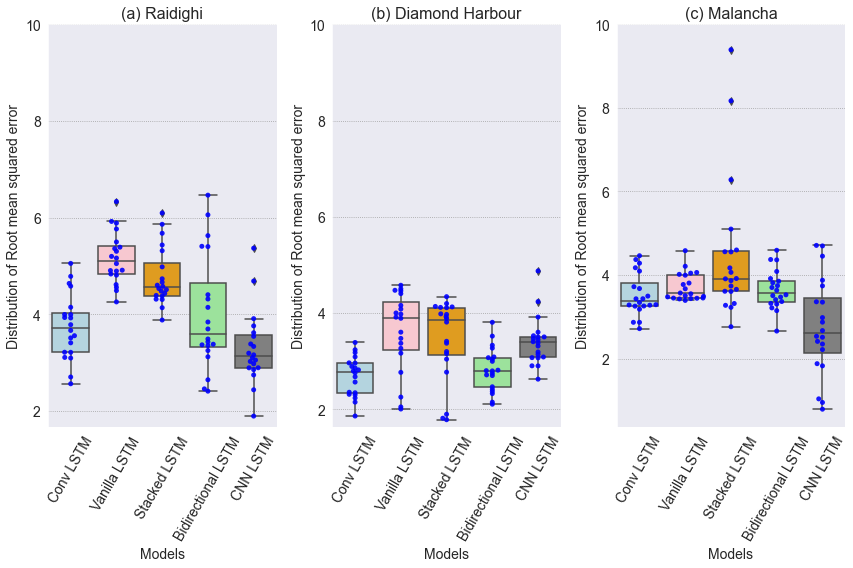

In [1]:
# Creating a dataframe
import pandas as pd
Models=['Convlstm_R','Vanillalstm_R','Stackedlstm_R','Bidirectional_R','CNN_R']
Modelss=['Conv LSTM','Vanilla LSTM','Stacked LSTM','Bidirectional LSTM','CNN LSTM']

Model=[]
values=[]
for i in range(5):
    h=pd.read_csv(Models[i]+'.csv')
    for j in range(len(h)):
        values.append(h['RMSE'][j])
        Model.append(Modelss[i])
data = pd.DataFrame({'Models':Model,'RMSE':values})
data
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

plt.figure(figsize=(12,8))
plt.subplot(1,3,1)
sns.boxplot("Models", "RMSE", data=data,
               palette=["lightblue", "pink", "orange","lightgreen","grey"])
sns.swarmplot("Models", "RMSE", data=data, palette=["blue", "blue", "blue","blue","blue"], alpha=0.9)
plt.title('(a) Raidighi',fontsize=16)
plt.ylabel("Distribution of Root mean squared error",fontsize=14)

plt.xlabel("Models",fontsize=14)
plt.xticks(fontsize=14, rotation=60)
plt.yticks([2,4,6,8,10],fontsize=14)

# Creating a dataframe
import pandas as pd
Models=['Convlstm_DH','Vanillalstm_DH','Stackedlstm_DH','Bidirectional_DH','CNN_DH']
Modelss=['Conv LSTM','Vanilla LSTM','Stacked LSTM','Bidirectional LSTM','CNN LSTM']

Model=[]
values=[]
for i in range(5):
    h=pd.read_csv(Models[i]+'.csv')
    for j in range(len(h)):
        values.append(h['RMSE'][j])
        Model.append(Modelss[i])
data = pd.DataFrame({'Models':Model,'RMSE':values})
data
plt.subplot(1,3,2)
sns.boxplot("Models", "RMSE", data=data,
               palette=["lightblue", "pink", "orange","lightgreen","grey"])
sns.swarmplot("Models", "RMSE", data=data, palette=["blue", "blue", "blue","blue","blue"], alpha=0.9)
plt.title('(b) Diamond Harbour',fontsize=16)
plt.ylabel("Distribution of Root mean squared error",fontsize=14)

plt.xlabel("Models",fontsize=14)
plt.xticks(fontsize=14, rotation=60)
plt.yticks([2,4,6,8,10],fontsize=14)
# Creating a dataframe
import pandas as pd
Models=['Convlstm_M','Vanillalstm_M','Stackedlstm_M','Bidirectional_M','CNN_M']
Modelss=['Conv LSTM','Vanilla LSTM','Stacked LSTM','Bidirectional LSTM','CNN LSTM']

Model=[]
values=[]
for i in range(5):
    h=pd.read_csv(Models[i]+'.csv')
    for j in range(len(h)):
        values.append(h['RMSE'][j])
        Model.append(Modelss[i])
data = pd.DataFrame({'Models':Model,'RMSE':values})
data
plt.subplot(1,3,3)
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})



sns.boxplot("Models", "RMSE", data=data,
               palette=["lightblue", "pink", "orange","lightgreen","grey"])
sns.swarmplot("Models", "RMSE", data=data, palette=["blue", "blue", "blue","blue","blue"], alpha=0.9)
plt.title('(c) Malancha',fontsize=16)
plt.ylabel("Distribution of Root mean squared error",fontsize=14)

plt.xlabel("Models",fontsize=14)
plt.xticks(fontsize=14, rotation=60)
plt.yticks([2,4,6,8,10],fontsize=14)
plt.tight_layout()
plt.savefig('Boxplot_lstm_DHMR.jpeg',dpi=400)
